In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### 1. 전처리과정
#- 데이터 로드
#- 데이터 분리(train data, test data)

In [3]:
from sklearn.model_selection import train_test_split
irisd=load_iris()
X_train,x_test,Y_train,y_test=train_test_split(irisd['data'],irisd['target'])

In [4]:
irisdf=pd.DataFrame(data=irisd['data'],columns=irisd['feature_names'])
irisdf['target']=irisd['target']

In [5]:
## ML 학습평가 , 모델준비

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
# 학습 및 평가
def DTml(_dep):
    dtc=DecisionTreeClassifier(max_depth=_dep)
    dtc.fit(X_train,Y_train)
    pred=dtc.predict(x_test)
    testp=accuracy_score(y_test,pred)
    print("DT depth:",_dep," / 정확도 : ",testp)
    return (_dep,testp)

In [9]:
# 최적화 변수 확인
res = []
for i in range(1,10):
    res.append(DTml(i))

DT depth: 1  / 정확도 :  0.5526315789473685
DT depth: 2  / 정확도 :  0.9473684210526315
DT depth: 3  / 정확도 :  0.9473684210526315
DT depth: 4  / 정확도 :  0.9736842105263158
DT depth: 5  / 정확도 :  0.9473684210526315
DT depth: 6  / 정확도 :  0.9473684210526315
DT depth: 7  / 정확도 :  0.9473684210526315
DT depth: 8  / 정확도 :  0.9473684210526315
DT depth: 9  / 정확도 :  0.9473684210526315


In [10]:
rdf = pd.DataFrame(data=res,columns=['depth','acc'])
rdf.head()

,depth,acc
0,1,0.552632
1,2,0.947368
2,3,0.947368
3,4,0.973684
4,5,0.947368


In [13]:
# final
dtc=DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

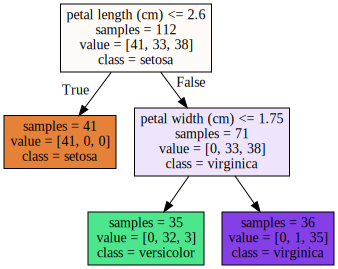

In [14]:
import graphviz
from sklearn.tree import export_graphviz
fname='tree.dot'
export_graphviz(dtc,out_file=fname,class_names=irisd['target_names'],
                feature_names=irisd['feature_names'],
               impurity=False,
               filled=True)

with open(fname) as f:
    dgraph=f.read()
dot=graphviz.Source(dgraph)
dot


In [15]:
fimp=dtc.feature_importances_
fimp

array([0.        , 0.        , 0.58333182, 0.41666818])

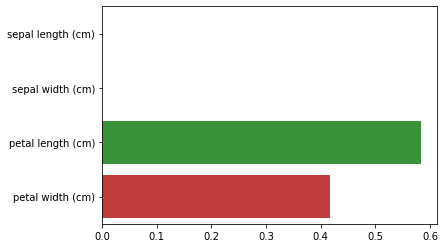

In [16]:
sns.barplot(y=irisd.feature_names,x=fimp)
plt.show()

In [2]:
!jt -t oceans16 -TN